In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Signal-to-noise of cell lines

In [6]:
data = dict()

runs = ["20220719_K562R1", "20220719_K562R2", "20220719_K562R3", "20220719_K562R4", "20220729_K562R1", "20220729_K562R2"]
d = pd.read_excel("../../1_NanoNASCseq/data/NanoNASCseq_summary_selected.xls")
d = d[[x in runs for x in d["Run"]]]
d1 = d[(d["Strain"] == "K562") & (d["s4U"] == 0) & (d["Time"] == 3) & (d["ActD"].isna()) & (d["UMIs"] >= 5000)]
d2 = d[(d["Strain"] == "K562") & (d["s4U"] == 50) & (d["Time"] == 3) & (d["ActD"].isna()) & (d["UMIs"] >= 5000) & (d["TCRatio"] >= 0.008)]
print(len(d1), len(d2))
data["K562,0uM,3h"] = d1[["Pe", "Pc", "Pc/Pe"]]
data["K562,50uM,3h"] = d2[["Pe", "Pc", "Pc/Pe"]]

runs = ["20220818_mESCR1", "20220818_mESCR2", "20220818_mESCR3"]
d = pd.read_excel("../../1_NanoNASCseq/data/NanoNASCseq_summary_selected.xls")
d = d[[x in runs for x in d["Run"]]]
d1 = d[(d["Strain"] == "mESC") & (d["s4U"] == 0) & (d["Time"] == 3) & (d["ActD"].isna()) & (d["UMIs"] >= 5000)]
d2 = d[(d["Strain"] == "mESC") & (d["s4U"] == 400) & (d["Time"] == 3) & (d["ActD"].isna()) & (d["UMIs"] >= 5000) & (d["TCRatio"] >= 0.01)]
print(len(d1), len(d2))
data["mESC,0uM,3h"] = d1[["Pe", "Pc", "Pc/Pe"]]
data["mESC,400uM,3h"] = d2[["Pe", "Pc", "Pc/Pe"]]

97 89
22 39


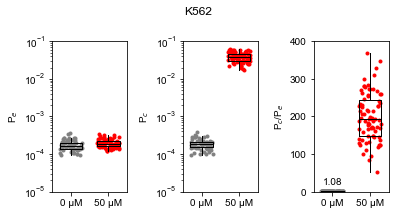

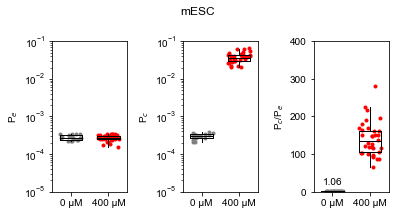

In [25]:
for strain in ["K562", "mESC"]:
    if strain == "K562":
        s4u = 50
        d1 = data["K562,0uM,3h"]
        d2 = data["K562,50uM,3h"]
        ticks = ["0 μM", "50 μM"]
    else:
        s4u = 400
        d1 = data["mESC,0uM,3h"]
        d2 = data["mESC,400uM,3h"]
        ticks = ["0 μM", "400 μM"]
        
    d1 = d1[~(d1["Pe"].isna() | d1["Pc"].isna())]
    d2 = d2[~(d2["Pe"].isna() | d2["Pc"].isna())]
        
    np.random.seed(0)

    pc1, pe1 = d1["Pc"], d1["Pe"]
    pc2, pe2 = d2["Pc"], d2["Pe"]
    
    colors = ["grey", "red"]
    
    w = 0.6
        
    fig, axs = plt.subplots(1, 3, figsize=(5.6, 3))
    fig.suptitle(strain)
    
    plt.sca(axs[0])
    ys_list = [pe1, pe2]
    plt.boxplot(ys_list, positions=[0, 1], widths=w, 
                showcaps=False, showfliers=False, medianprops={"color": "black"})
    for x, ys in enumerate(ys_list):
        xs = np.random.rand(len(ys)) * w + x - w/2
        plt.scatter(xs, ys, marker=".", color=colors[x])
    plt.gca().set_yscale("log")
    plt.xticks([0, 1], ticks)
    plt.ylim(0.00001, 0.1)
    plt.ylabel("P$_e$")
    
    plt.sca(axs[1])
    ys_list = [pc1, pc2]
    plt.boxplot(ys_list, positions=[0, 1], widths=w, 
                showcaps=False, showfliers=False, medianprops={"color": "black"})
    for x, ys in enumerate(ys_list):
        xs = np.random.rand(len(ys)) * w + x - w/2
        plt.scatter(xs, ys, marker=".", color=colors[x])
    plt.gca().set_yscale("log")
    plt.xticks([0, 1], ticks)
    plt.ylim(0.00001, 0.1)
    plt.ylabel("P$_c$")
    
    plt.sca(axs[2])
    ys_list = [pc1 / pe1, pc2 / pe2]
    plt.boxplot(ys_list, positions=[0, 1], widths=w, 
                showcaps=False, showfliers=False, medianprops={"color": "black"})
    for x, ys in enumerate(ys_list):
        xs = np.random.rand(len(ys)) * w + x - w/2
        plt.scatter(xs, ys, marker=".", color=colors[x])
    plt.text(0, 20, "%.2f" % np.median(ys_list[0]), ha="center")
    # plt.gca().set_yscale("log")
    plt.xticks([0, 1], ticks)
    plt.ylim(0, 400)
    plt.ylabel("P$_c$/P$_e$")
    
    plt.tight_layout()
    plt.savefig("figures/signal_to_noise.%s.pdf" % strain, dpi=300)
    # break

# Comparison

In [2]:
data = dict()

runs = ["20220719_K562R1", "20220719_K562R2", "20220719_K562R3", "20220719_K562R4", "20220729_K562R1", "20220729_K562R2"]
d = pd.read_excel("../../1_NanoNASCseq/data/NanoNASCseq_summary_selected.xls")
d = d[[x in runs for x in d["Run"]]]
d1 = d[(d["Strain"] == "K562") & (d["s4U"] == 0) & (d["Time"] == 3) & (d["ActD"].isna()) & (d["UMIs"] >= 5000)]
d2 = d[(d["Strain"] == "K562") & (d["s4U"] == 50) & (d["Time"] == 3) & (d["ActD"].isna()) & (d["UMIs"] >= 5000) & (d["TCRatio"] >= 0.008)]
print(len(d1), len(d2))
data["NanoNASC-seq,0uM,3h"] = d1[["Pe", "Pc", "Pc/Pe"]]
data["NanoNASC-seq,50uM,3h"] = d2[["Pe", "Pc", "Pc/Pe"]]

97 89


In [3]:
def load_pc(d):
    array = []
    for run, cell in d[["Run", "Cell"]].values:
        path = "../../2_NASCseq/results/mismatch/pc/%s/%s.tsv" % (run, cell)
        m = pd.read_csv(path, sep="\t", header=0)
        array.append(m)
    return pd.concat(array)

d = pd.read_excel("../../2_NASCseq/data/NASCseq.xlsx")
d1 = d[(d["Strain"] == "K562") & (d["s4U"] == 0) & (d["Time"] == 3) & (d["Layout"] == "PE") & (d["Cells"] == 1)]
d2 = d[(d["Strain"] == "K562") & (d["s4U"] == 50) & (d["Time"] == 3) & (d["Layout"] == "PE") & (d["Cells"] == 1)]
d3 = d[(d["Strain"] == "K562") & (d["s4U"] == 0) & (d["Time"] == 3) & (d["Layout"] == "SE")]
d4 = d[(d["Strain"] == "K562") & (d["s4U"] == 50) & (d["Time"] == 3) & (d["Layout"] == "SE")]
d5 = d[(d["Strain"] == "K562") & (d["s4U"] == 50) & (d["Time"] == 1) & (d["Layout"] == "PE") & (d["Run"] == "GSE128273_NASCseq_K562")]
d1 = load_pc(d1)
d2 = load_pc(d2)
d3 = load_pc(d3)
d4 = load_pc(d4)
d5 = load_pc(d5)
print(len(d1), len(d2), len(d3), len(d4), len(d5))
data["NASC-seq,0uM,3h"] = d1
data["NASC-seq,50uM,3h"] = d2
data["GSE128273,0uM,3h,SE"] = d3
data["GSE128273,50uM,3h,SE"] = d4
data["GSE128273,50uM,1h"] = d5

37 36 16 80 142


--------------------------------------------------------------------------------
Mean: 1.249960549887823
Median: 1.2880530758767597
--------------------------------------------------------------------------------
Mean: 14.609715495261689
Median: 11.676636410716945
--------------------------------------------------------------------------------
Mean: 34.460640862643956
Median: 35.90751311020196
--------------------------------------------------------------------------------
Mean: 1.1790133604920494
Median: 1.1652634787299108
--------------------------------------------------------------------------------
Mean: 66.65255922875502
Median: 68.32947360518317
--------------------------------------------------------------------------------
Mean: 1.0817475598444197
Median: 1.081532254849392
--------------------------------------------------------------------------------
Mean: 199.27246219026375
Median: 192.97012205137975


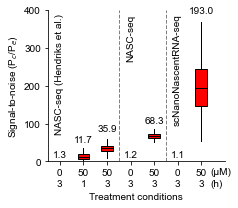

In [17]:
array = []

ys = data["GSE128273,0uM,3h,SE"]["Pc/Pe"]
array.append(ys[~ys.isna()])
ys = data["GSE128273,50uM,1h"]["Pc/Pe"]
array.append(ys[~ys.isna()])
ys = data["GSE128273,50uM,3h,SE"]["Pc/Pe"]
array.append(ys[~ys.isna()])

ys = data["NASC-seq,0uM,3h"]["Pc/Pe"]
array.append(ys[~ys.isna()])
ys = data["NASC-seq,50uM,3h"]["Pc/Pe"]
array.append(ys[~ys.isna()])

ys = data["NanoNASC-seq,0uM,3h"]["Pc/Pe"]
array.append(ys[~ys.isna()])
ys = data["NanoNASC-seq,50uM,3h"]["Pc/Pe"]
array.append(ys[~ys.isna()])



colors = ["grey", "red", "red", "grey", "red", "grey", "red"]

plt.figure(figsize=(3.4, 3))
# plt.boxplot(array, showcaps=False, showfliers=False)

w = 0.5

text_ys = [10, 50, 80, 10, 100, 10, 390]

for i, ys in enumerate(array):
    print("-" * 80)
    print("Mean:", np.mean(ys))
    print("Median:", np.median(ys))
    plt.boxplot([array[i]], positions=[i], widths=w, patch_artist=True, 
        showcaps=False, 
        boxprops={"facecolor": colors[i]},
        medianprops={"color": "black"},
        showfliers=False, 
        flierprops={"markerfacecolor": colors[i], "markeredgecolor": "none", "marker": "."})
    plt.text(i, text_ys[i], round(np.median(ys), 1), ha="center")
plt.xticks([0, 1, 2, 3, 4, 5, 6], ["0\n3", "50\n1", "50\n3", "0\n3", "50\n3", "0\n3", "50\n3"])
plt.axvline(2.5, lw=1, ls="--", color="grey")
plt.axvline(4.5, lw=1, ls="--", color="grey")

plt.text(0, 390, "NASC-seq (Hendriks et al.)", rotation=90, va="top", ha="center")
plt.text(3, 390, "NASC-seq", rotation=90, va="top", ha="center")
plt.text(5, 390, "scNanoNascentRNA-seq", rotation=90, va="top", ha="center")

plt.text(6.4, -33, "(μM)")
plt.text(6.4, -65, "(h)")
plt.xlim(-0.5, 7)
plt.ylim(0, 400)
plt.xlabel("Treatment conditions")
plt.ylabel("Signal-to-noise (P$_c$/P$_e$)")
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.tight_layout()
plt.savefig("figures/comparison.pc_pe.pdf", dpi=300)